# Import Libraries

In [1]:
import re
from nltk.tokenize import *
from matplotlib import pyplot as plt

# Regex patterns and functions

*Note: It's important to prefix your regex patterns with r to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings.*

*For example, "\n" in Python is used to indicate a new line, but if you use the r prefix, it will be interpreted as the raw string "\n" - that is, the character "\" followed by the character "n" - and not as a new line.*

In [2]:
my_string = "Let's write RegEx!"

# find words in a string
pattern=r'\w+'
print(re.findall(pattern, my_string))

['Let', 's', 'write', 'RegEx']


In [3]:
my_string="Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

# Split a string on sentence endings
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']


In [4]:
# Find all digits in a string
digits = r"\d+"
print(re.findall(digits, my_string))

['4', '19']


In [5]:
# Find all capitalized words in a string
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


In [6]:
# Split a string on spaces
spaces = r"\s+"
print(re.split(spaces, my_string))

["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


# Regex + Tokenization

In [7]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

# Tokenize string by words,#digits,?,!
pattern = r"(\w+|#\d|\?|!)"
print(regexp_tokenize(my_string, pattern))

['SOLDIER', '#1', 'Found', 'them', '?', 'In', 'Mercea', '?', 'The', 'coconut', 's', 'tropical', '!']


In [8]:
tweet= 'This is the best #nlp exercise ive found online! #python'

# find hashtags (#) in tweet
pattern1 = r"#\w+" 
print(regexp_tokenize(tweet,pattern1))

['#nlp', '#python']


In [9]:
tweet='Thanks @datacamp :) #nlp #python'

# find mentions (@) and hashtags (#) in tweet
pattern2 = r"(@\w+|#\w+)"
print(regexp_tokenize(tweet,pattern2))

['@datacamp', '#nlp', '#python']


In [10]:
tweets=['This is the best #nlp exercise ive found online! #python',
         '#NLP is super fun! <3 #learning']

# Use the TweetTokenizer to tokenize all tweets into one list

tknzr = TweetTokenizer() # an instance of TweetTokenizer
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning']]


# Non-ascii Tokenization

*Note: Unicode ranges for emoji are:*

*('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF')*

In [11]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text,capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text,emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


# Charting word length with NLTK

In [12]:
holy_grail="SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!"

# Split the script into lines
lines = holy_grail.split('\n')
print(lines)

['SCENE 1: [wind] [clop clop clop] ', 'KING ARTHUR: Whoa there!  [clop clop clop] ', 'SOLDIER #1: Halt!  Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!']


In [13]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
print(lines)

['SCENE 1: [wind] [clop clop clop] ', ' Whoa there!  [clop clop clop] ', ' Halt!  Who goes there?', ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!']


In [14]:
# Tokenize each line
tokenized_lines = [regexp_tokenize(s,'\w+') for s in lines]
print(tokenized_lines)

[['SCENE', '1', 'wind', 'clop', 'clop', 'clop'], ['Whoa', 'there', 'clop', 'clop', 'clop'], ['Halt', 'Who', 'goes', 'there'], ['It', 'is', 'I', 'Arthur', 'son', 'of', 'Uther', 'Pendragon', 'from', 'the', 'castle', 'of', 'Camelot', 'King', 'of', 'the', 'Britons', 'defeator', 'of', 'the', 'Saxons', 'sovereign', 'of', 'all', 'England']]


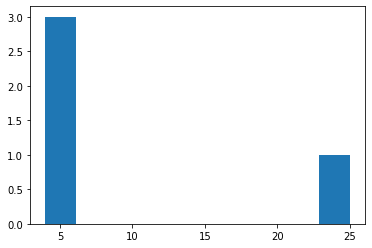

In [15]:
# Plot a histogram of the line lengths
line_num_words = [len(t_line) for t_line in tokenized_lines]
plt.hist(line_num_words)
plt.show()

# References

[datacamp](https://github.com/AparGarg99/Tutorials/files/5988939/regex.pdf)